### The aim of this is to try to duplicate the exercise of this medium post
https://towardsdatascience.com/aifortrading-2edd6fac689d

In [9]:
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

quandl.ApiConfig.api_key = 'xxxxxxx'

In [10]:
data = quandl.get_table('WIKI/PRICES', ticker = ['GS'], 
                        # qopts = { 'columns': ['ticker', 'date', 'open', 'adj_close'] }, 
                        date = { 'gte': '2010-01-01', 'lte': '2018-12-31' }, 
                        paginate=True)
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,GS,2018-03-27,255.89,257.060,245.61,247.26,2970625.0,0.0,1.0,255.89,257.060,245.61,247.26,2970625.0
1,GS,2018-03-26,250.65,255.360,248.45,254.88,3733912.0,0.0,1.0,250.65,255.360,248.45,254.88,3733912.0
2,GS,2018-03-23,253.63,254.954,244.93,245.26,3603803.0,0.0,1.0,253.63,254.954,244.93,245.26,3603803.0
3,GS,2018-03-22,258.42,260.820,252.18,252.60,4175915.0,0.0,1.0,258.42,260.820,252.18,252.60,4175915.0
4,GS,2018-03-21,263.01,266.490,260.31,261.85,2811962.0,0.0,1.0,263.01,266.490,260.31,261.85,2811962.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 14 columns):
ticker         2071 non-null object
date           2071 non-null datetime64[ns]
open           2071 non-null float64
high           2071 non-null float64
low            2071 non-null float64
close          2071 non-null float64
volume         2071 non-null float64
ex-dividend    2071 non-null float64
split_ratio    2071 non-null float64
adj_open       2071 non-null float64
adj_high       2071 non-null float64
adj_low        2071 non-null float64
adj_close      2071 non-null float64
adj_volume     2071 non-null float64
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 226.6+ KB


In [12]:
df = data

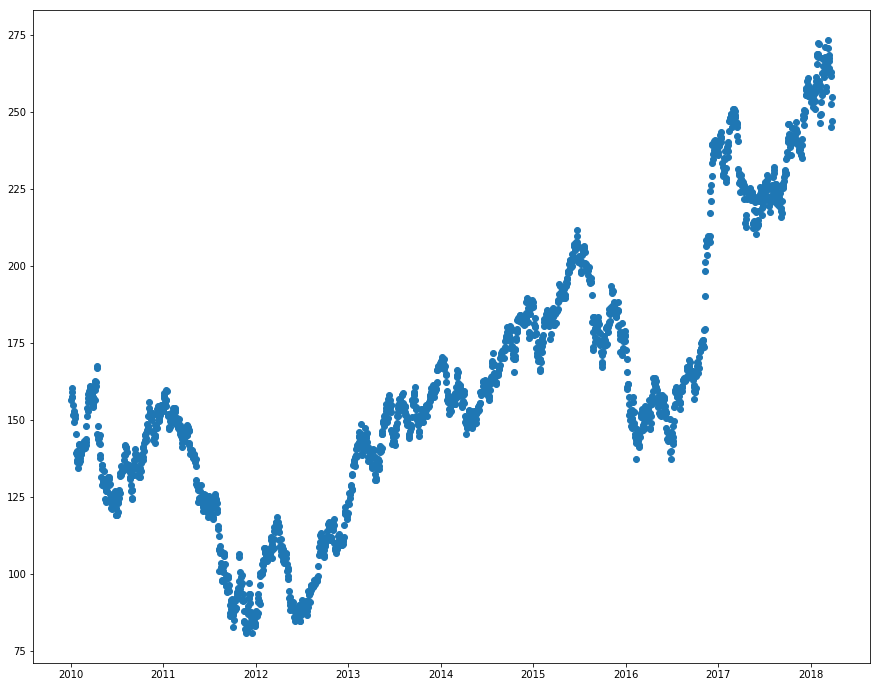

In [13]:
plt.figure(figsize=(15,12))
plt.plot_date(data.date, data.adj_close)

In [18]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

from datetime import datetime

trace = go.Ohlc(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~studdykid/0 or inside your plot.ly account where it is named 'simple_candlestick'


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [22]:
## Create technical indicators

In [37]:
""" Function to create the technical indicators """
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['close'].ewm(span=26)
    dataset['12ema'] = pd.DataFrame.ewm(dataset['close'], span=12)
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
# Create Bollinger Bands
    dataset['20sd'] = pd.stats.moments.rolling_std(dataset['close'],20)
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['close']-1
    
    return dataset

In [38]:
df_tech_feat = get_technical_indicators(df)

NotImplementedError: See issue #11704 https://github.com/pandas-dev/pandas/issues/11704

In [30]:
pd.__version__

'0.23.4'